In [6]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['cf807027e00d476eb027633d5d3d9411.f-id.94f1d3d2424841f48bbaaf8fdf3f8e23']
ds = experiment.get_intermediate_dataset(
    node_id='3ab51494-3686-41a2-b3d3-1f738649e4b5-16844',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [7]:
frame

,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_description
0,Caucasian,Female,[0-10),unknown,25,1,-1.137649,unknown,Pediatrics-Endocrinology,-0.106517,...,No,No,No,No,No,No,No,No,NO,unknown
1,Caucasian,Female,[10-20),unknown,1,7,-0.467653,unknown,unknown,0.808384,...,Up,No,No,No,No,No,Ch,Yes,YES,Emergency
2,AfricanAmerican,Female,[20-30),unknown,1,7,-0.802651,unknown,unknown,-1.631351,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,Caucasian,Male,[30-40),unknown,1,7,-0.802651,unknown,unknown,0.045967,...,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,Caucasian,Male,[40-50),unknown,1,7,-1.137649,unknown,unknown,0.401761,...,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency
5,Caucasian,Male,[50-60),unknown,1,2,-0.467653,unknown,unknown,-0.614795,...,Steady,No,No,No,No,No,No,Yes,YES,Urgent
6,Caucasian,Male,[60-70),unknown,1,2,-0.132655,unknown,unknown,1.367490,...,Steady,No,No,No,No,No,Ch,Yes,NO,Elective
7,Caucasian,Male,[70-80),unknown,1,7,0.202343,unknown,unknown,1.519973,...,No,No,No,No,No,No,No,Yes,YES,Emergency
8,Caucasian,Female,[80-90),unknown,1,4,2.882327,unknown,unknown,1.265834,...,Steady,No,No,No,No,No,Ch,Yes,NO,Urgent
9,Caucasian,Female,[90-100),unknown,3,4,2.547329,unknown,InternalMedicine,-0.513139,...,Steady,No,No,No,No,No,Ch,Yes,NO,Elective


In [8]:
def diabetes_bar(df):   
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import numpy as np
    import matplotlib.pyplot as plt
    
## Create a series of bar plots for the various levels of the
## string columns in the data frame by readmi_class. 
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype not in [np.int64, np.int32, np.float64]):
            temp1 = df.ix[df.readmitted == 'YES', col].value_counts()
            temp0 = df.ix[df.readmitted == 'NO', col].value_counts() 
        
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            temp1.plot(kind = 'bar', ax = ax1)
            ax1.set_title('Values of ' + col + '\n for readmitted patients')
            temp0.plot(kind = 'bar', ax = ax0)
            ax0.set_title('Values of ' + col + '\n for patients not readmitted')
            fig.savefig('bar_' + col + '.png')
            
    return 'Done'

def diabetes_box(df):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import numpy as np
    import matplotlib.pyplot as plt
    
## Now make some box plots of the columbns with numerical values.
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            temp1 = df.ix[df.readmitted == 'YES', col]
            temp0 = df.ix[df.readmitted == 'NO', col]  
             
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            ax1.boxplot(temp1.as_matrix())
            ax1.set_title('Box plot of ' + col + '\n for readmitted patients')
            ax0.boxplot(temp0.as_matrix())
            ax0.set_title('Box plot of ' + col + '\n for patients not readmitted')
            fig.savefig('box_' + col + '.png')

    return 'Done'
    
def diabetes_hist(df):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import numpy as np
    import matplotlib.pyplot as plt
    
## Now make historgrams of the columbns with numerical values.
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            temp1 = df.ix[df.readmitted == 'YES', col]
            temp0 = df.ix[df.readmitted == 'NO', col]  
             
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            ax1.hist(temp1.as_matrix(), bins = 30)
            ax1.set_title('Histogram of ' + col + '\n for readmitted patients')
            ax0.hist(temp0.as_matrix(), bins = 30)
            ax0.set_title('Histogram of ' + col + '\n for patients not readmitted')
            fig.savefig('hist_' + col + '.png')

    return 'Done'    



/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figure

'Done'

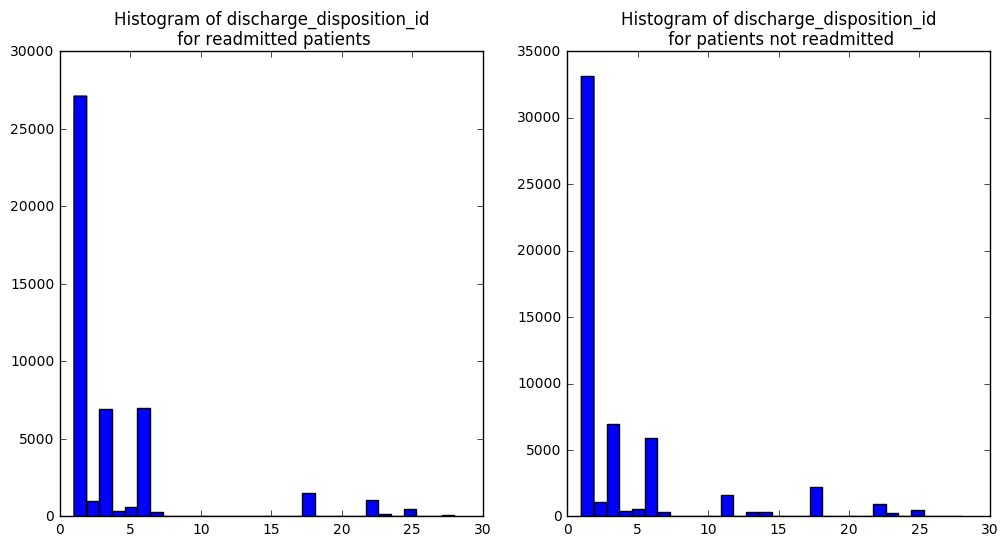

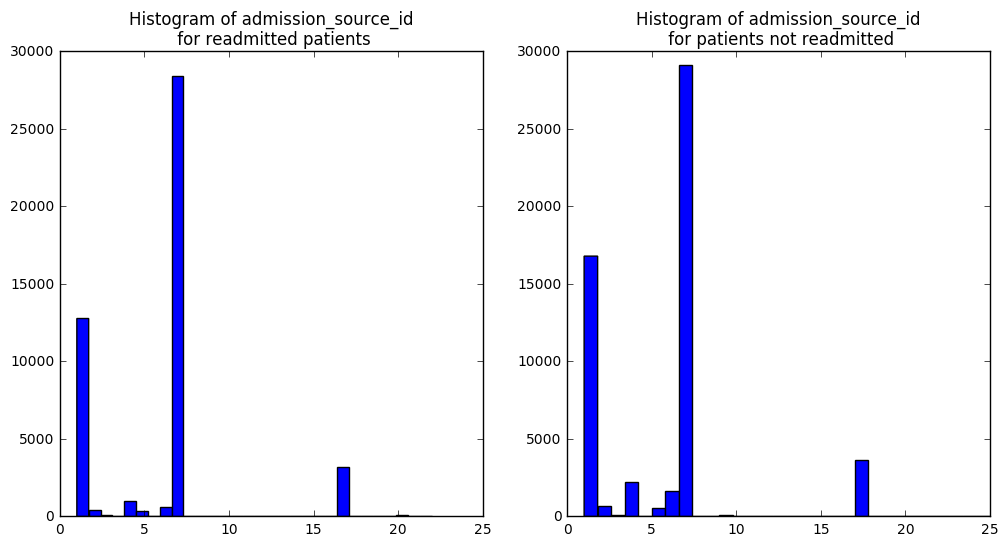

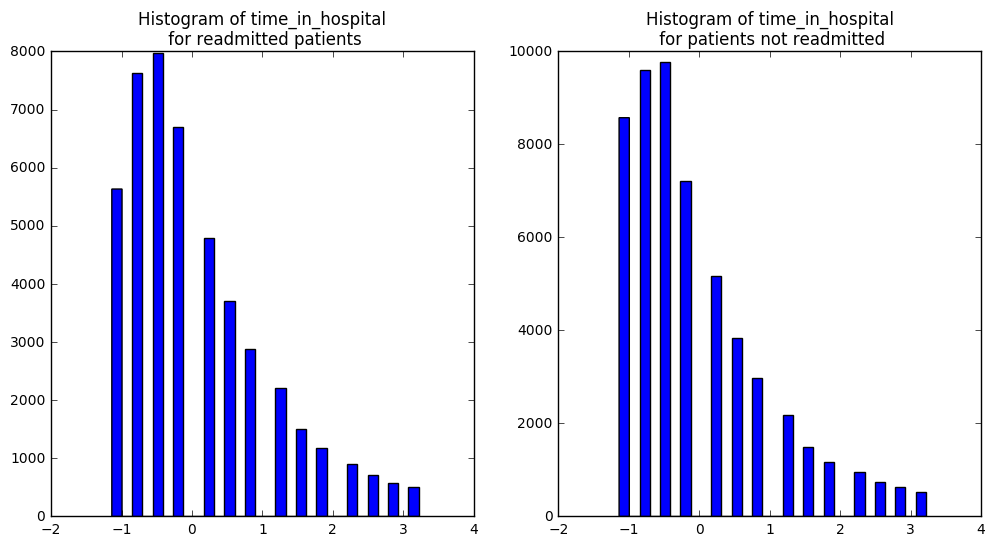

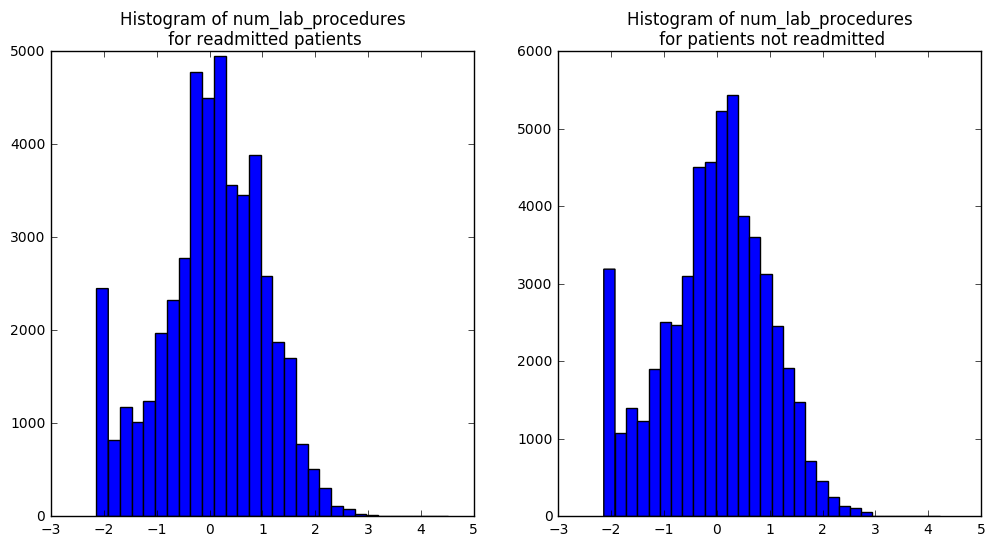

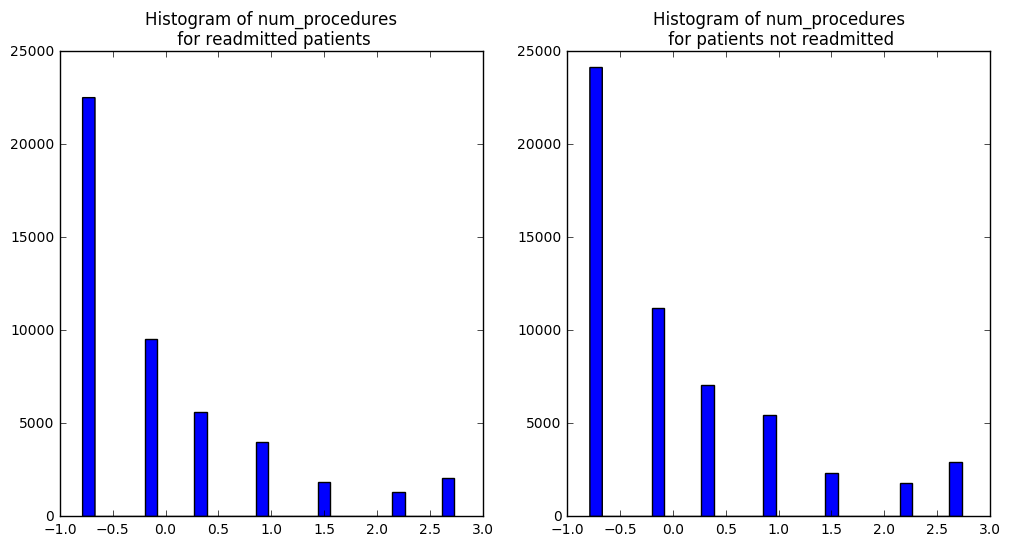

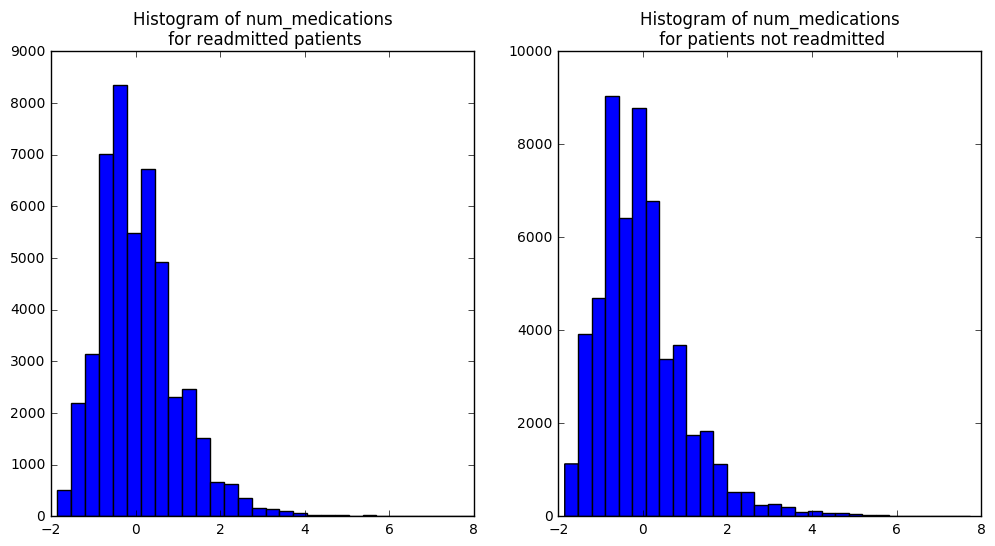

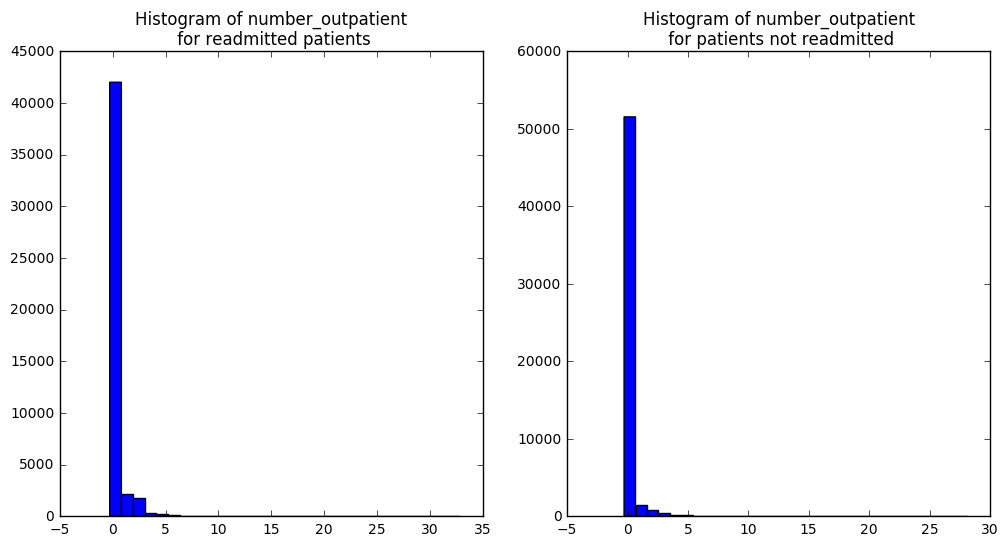

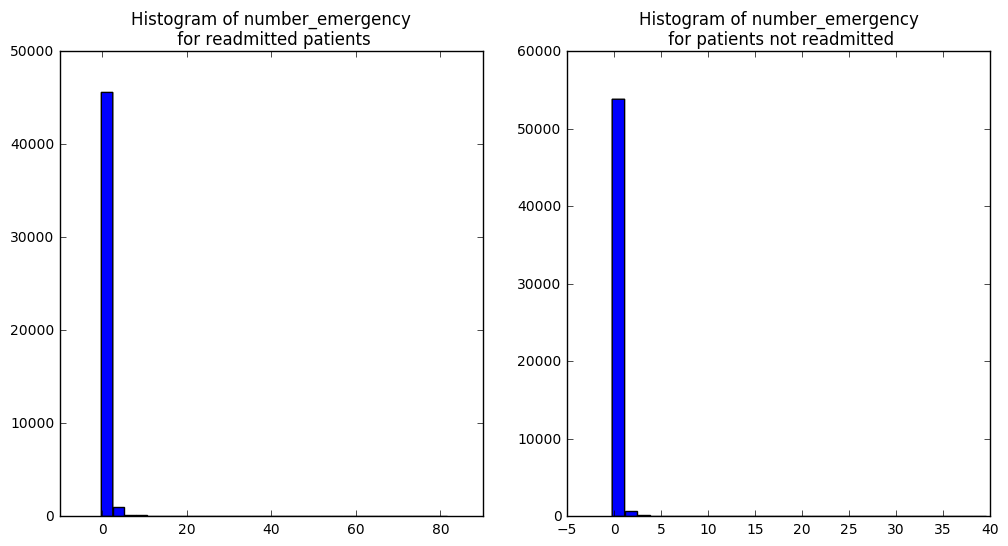

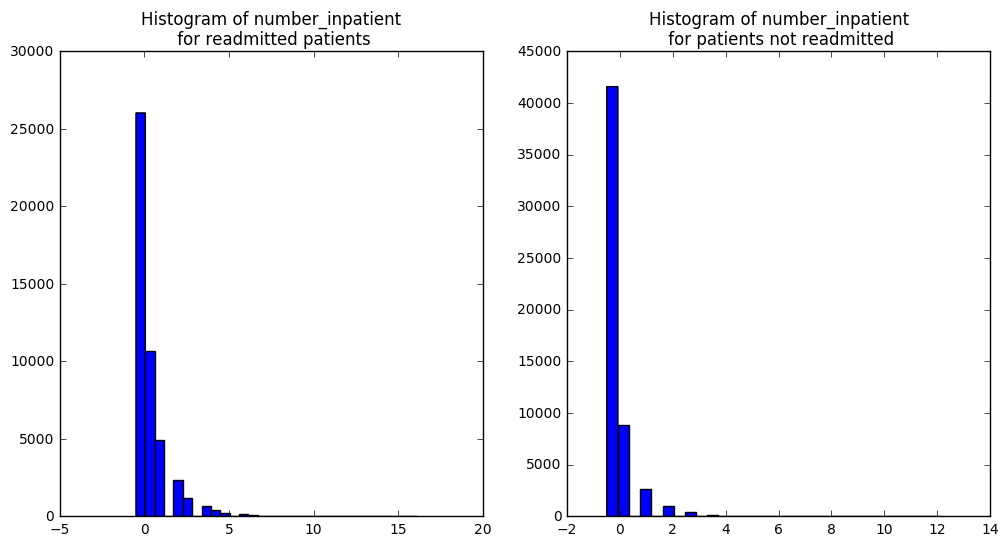

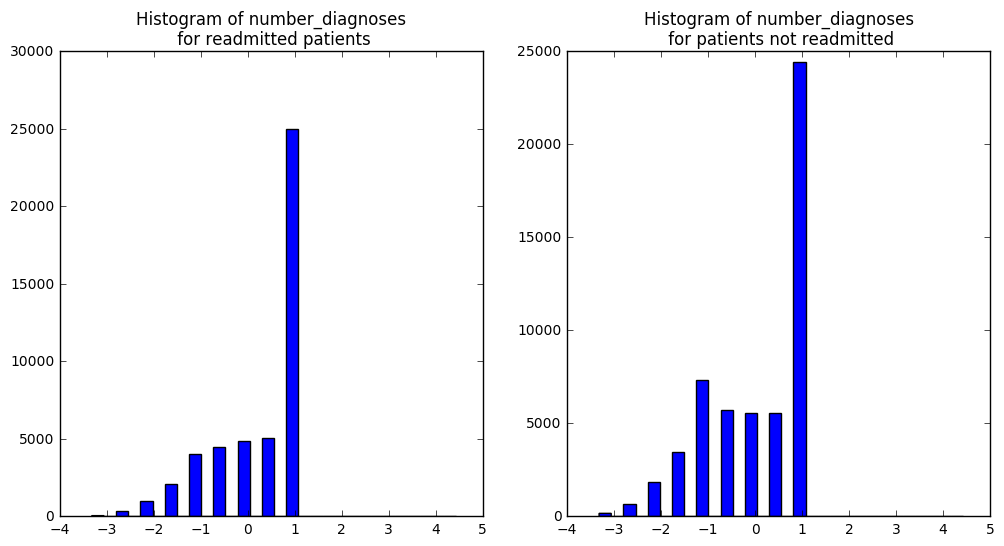

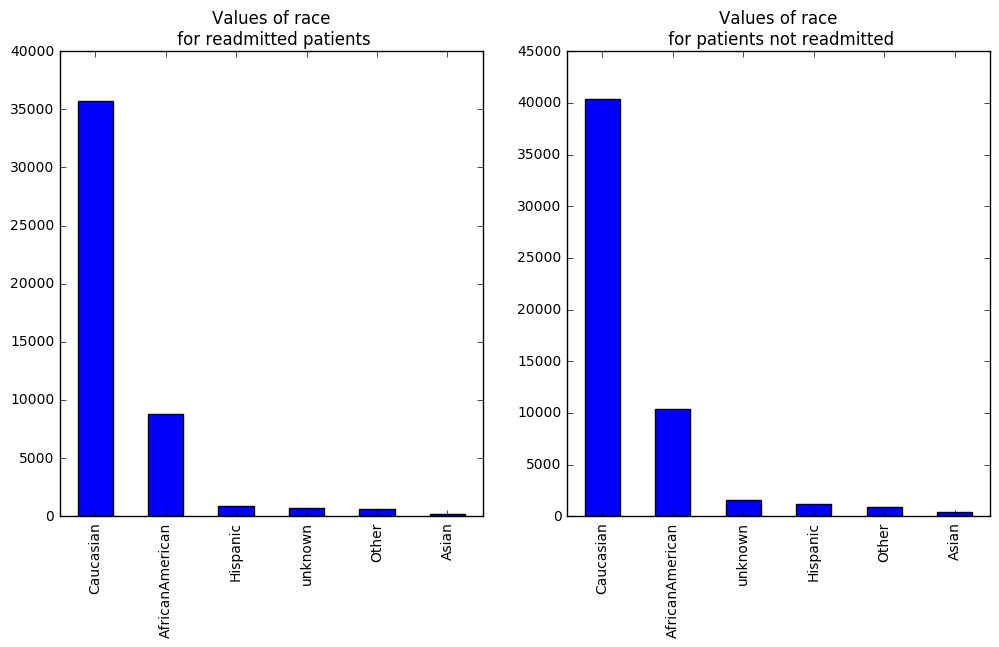

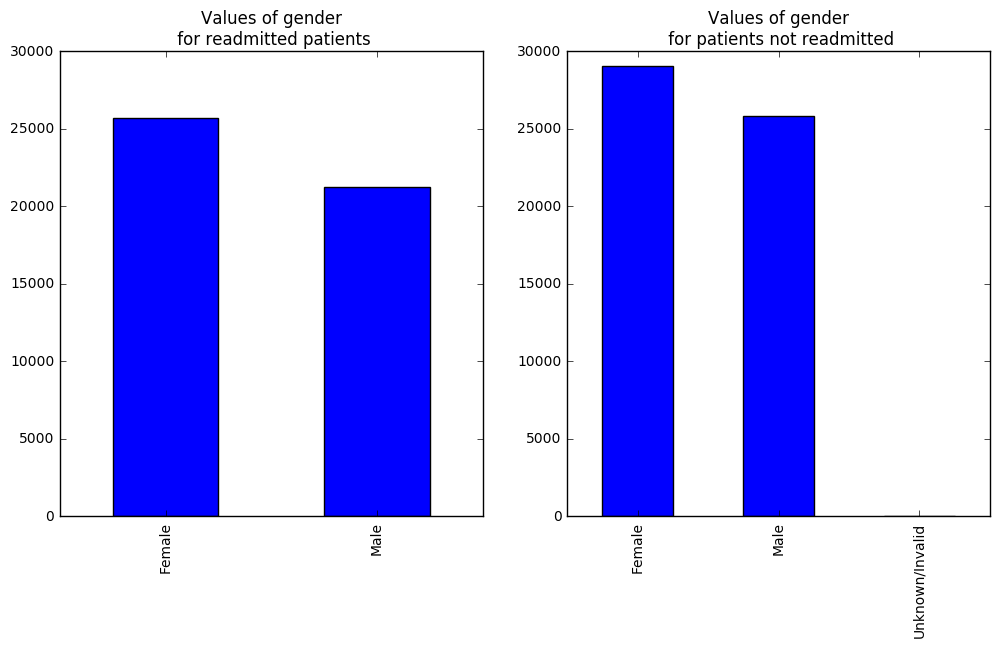

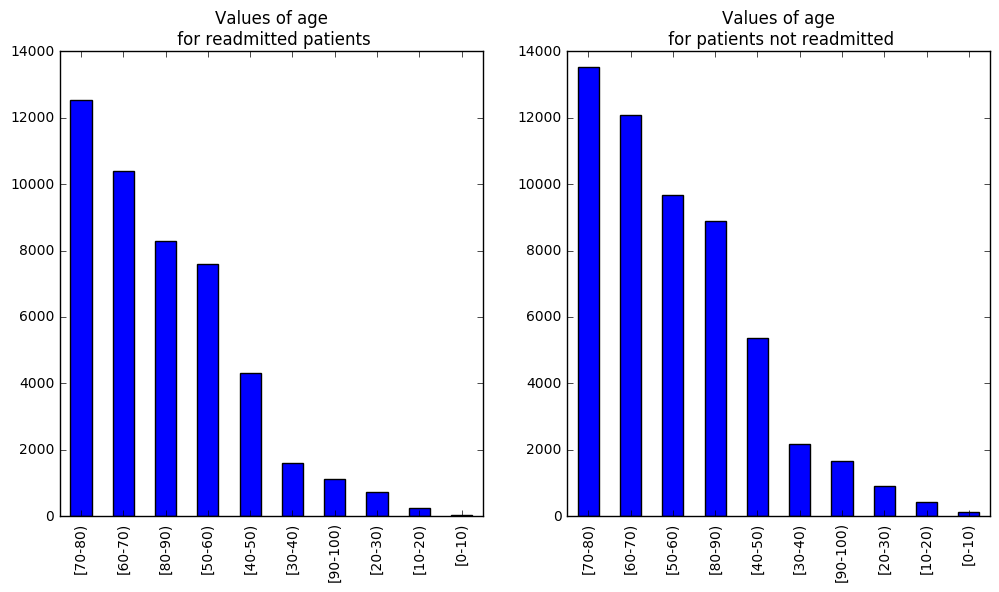

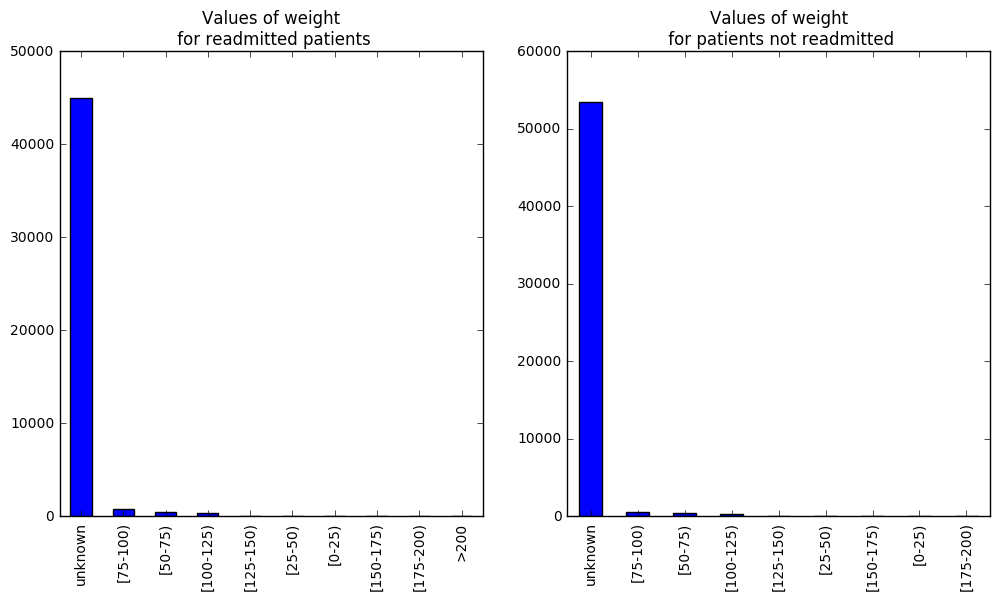

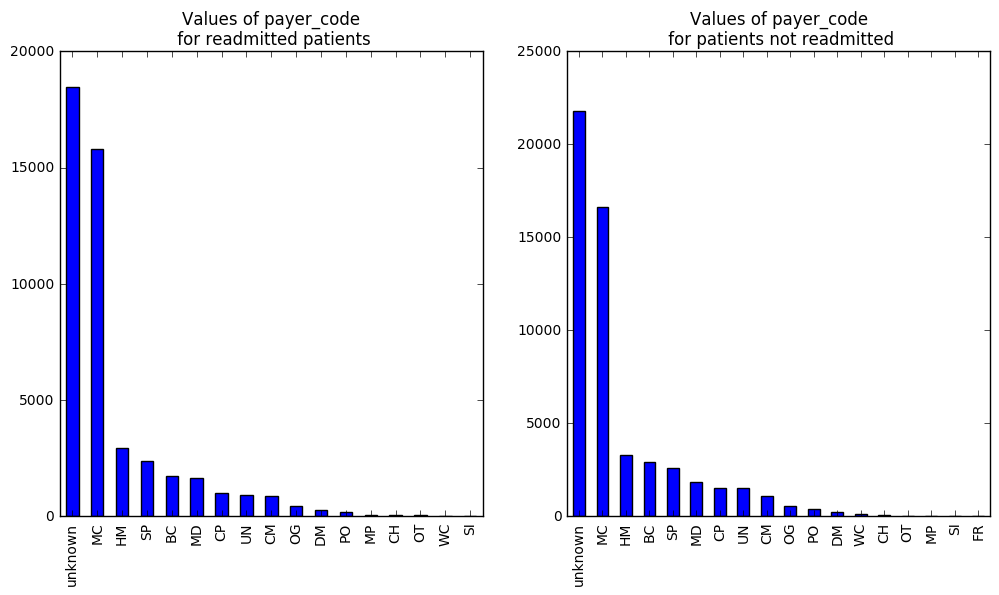

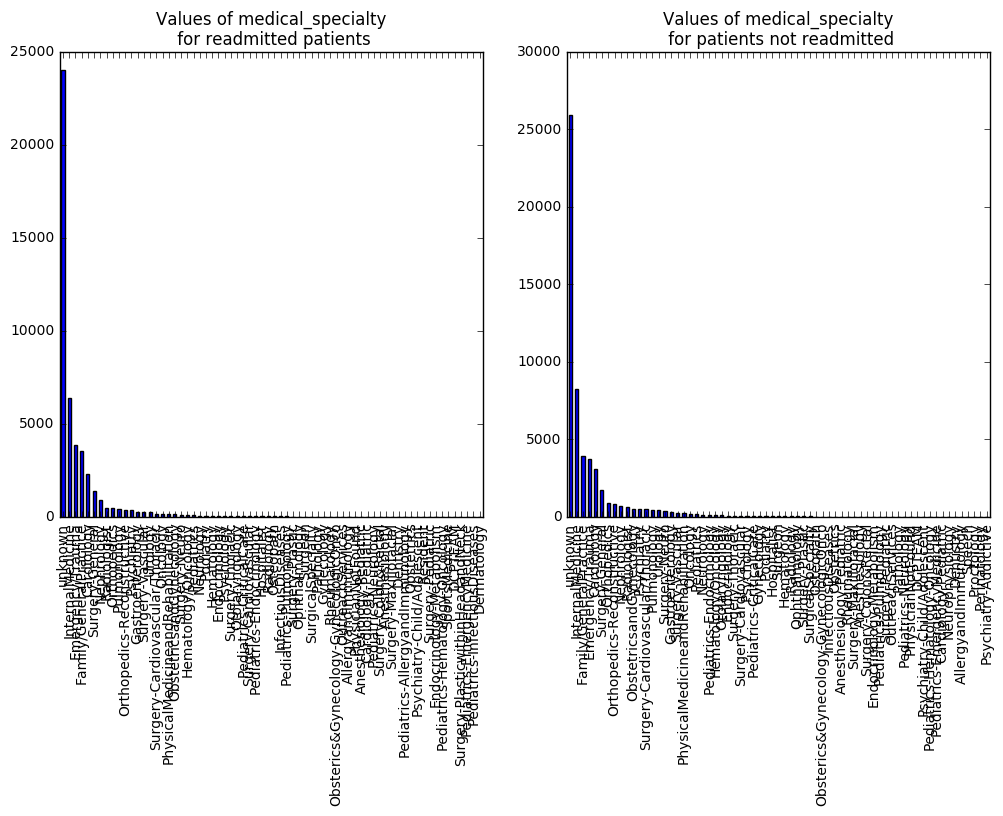

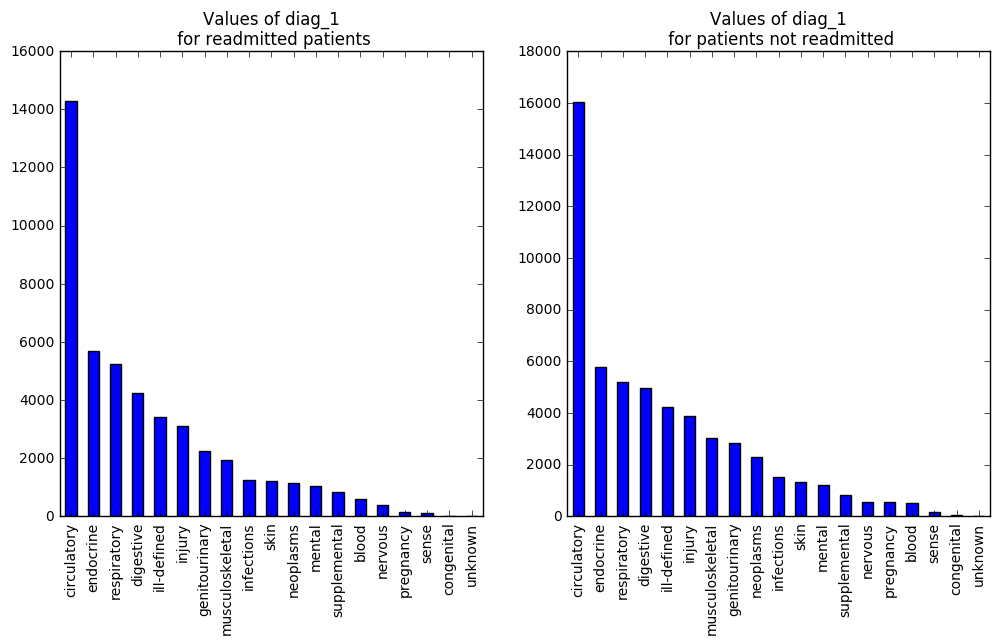

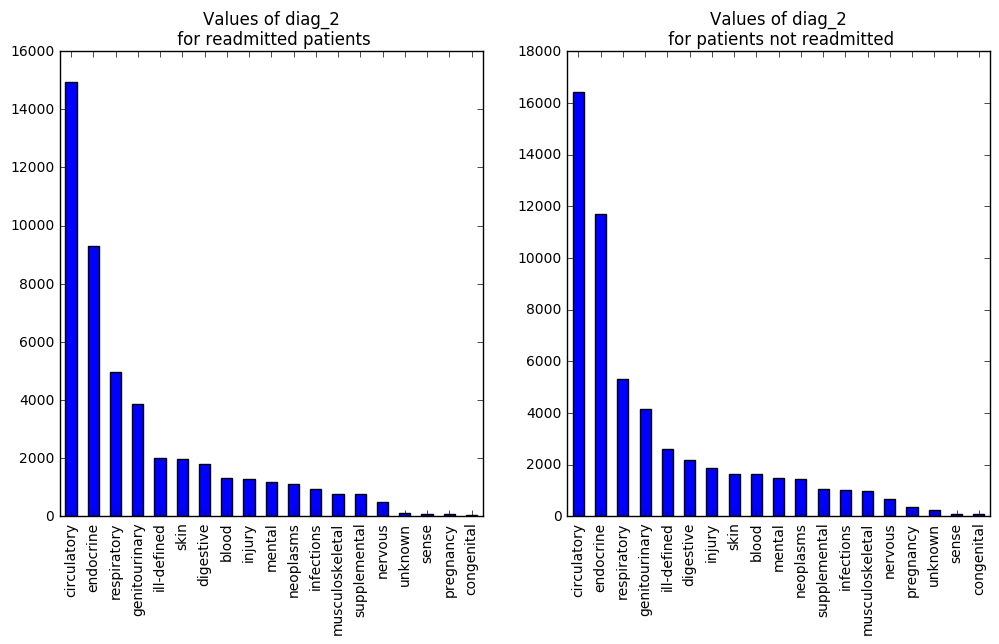

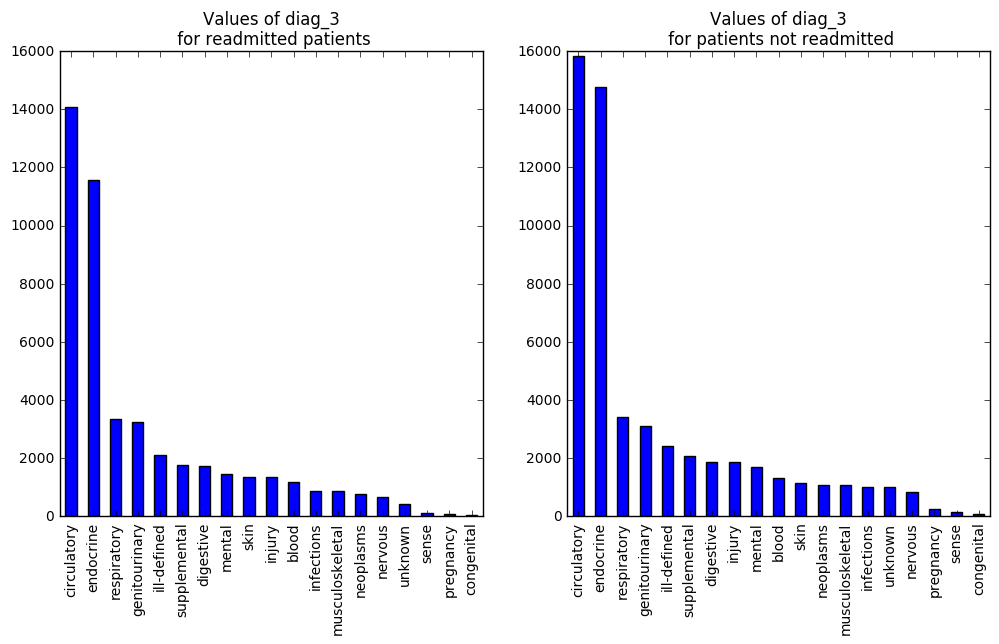

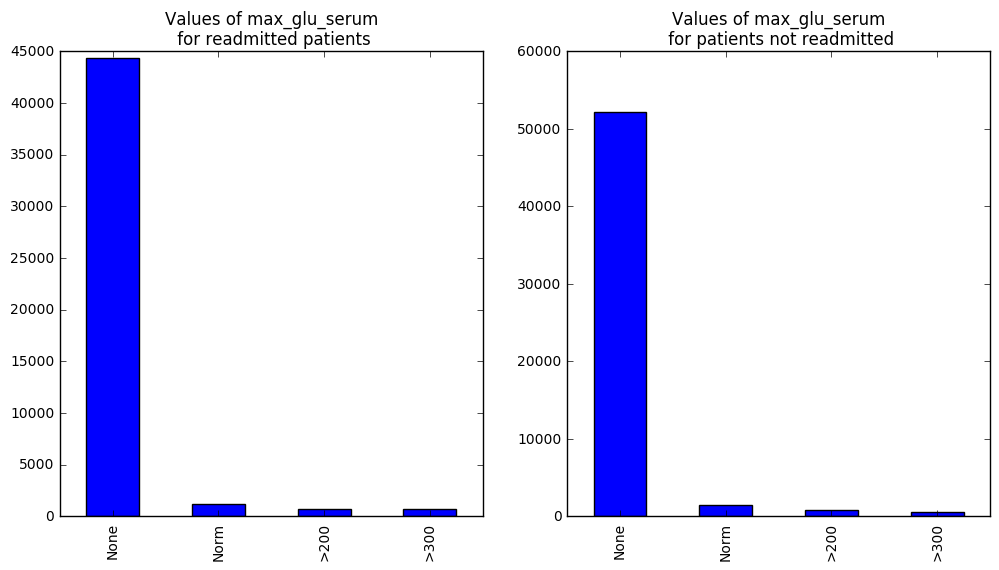

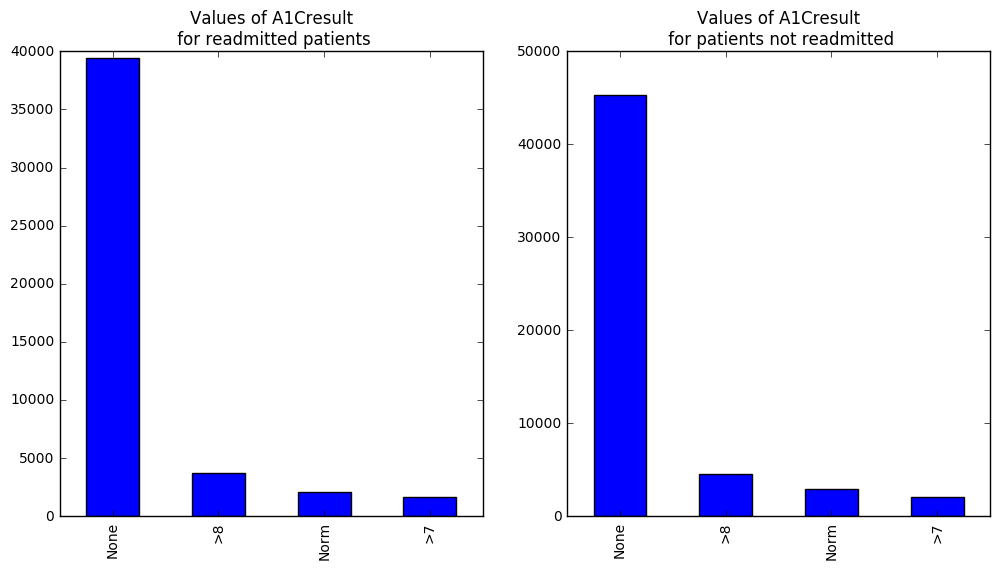

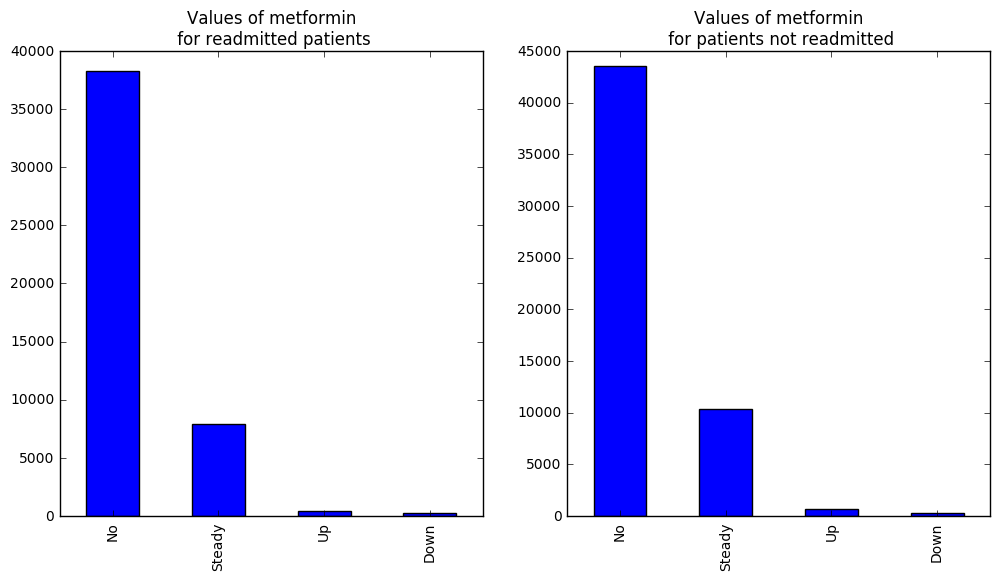

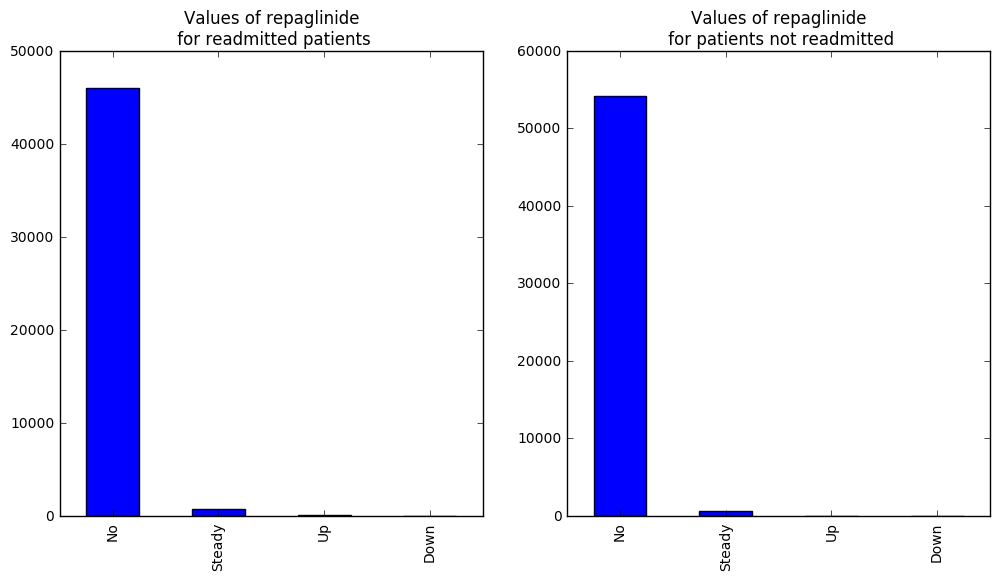

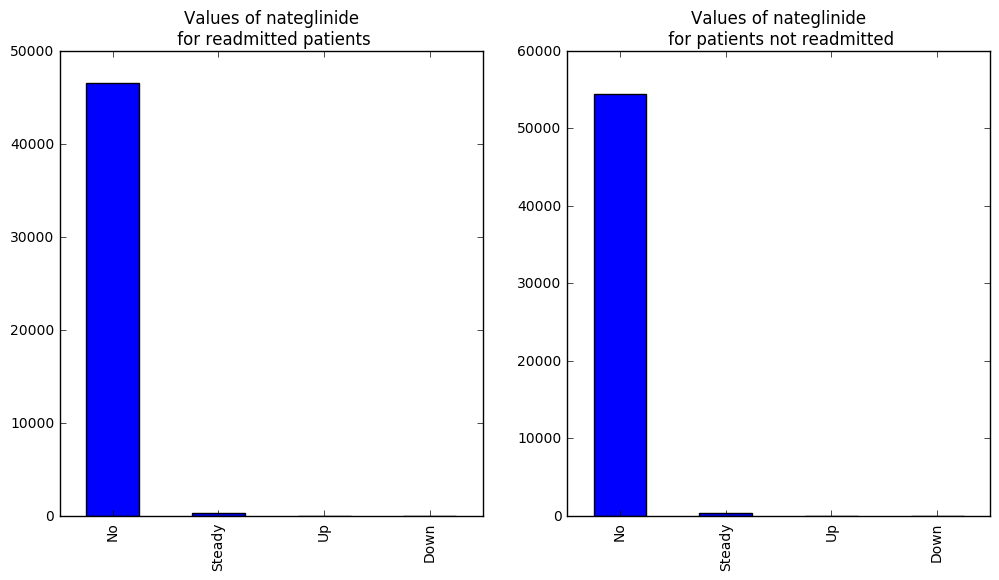

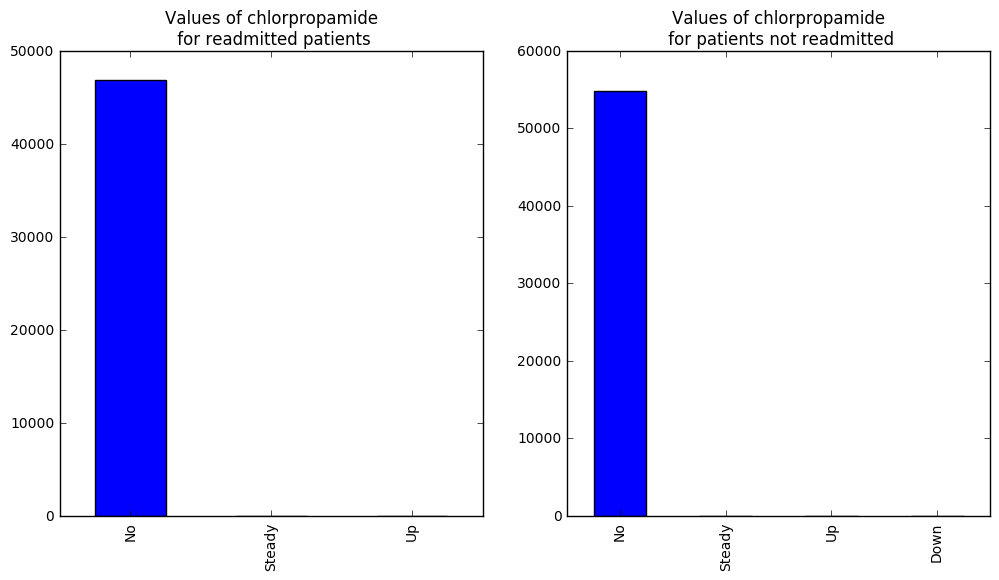

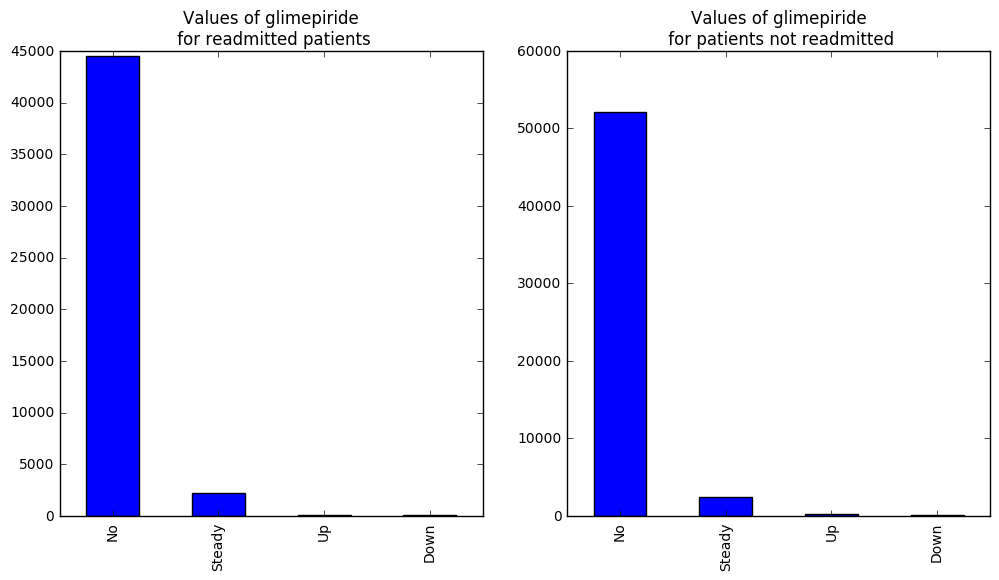

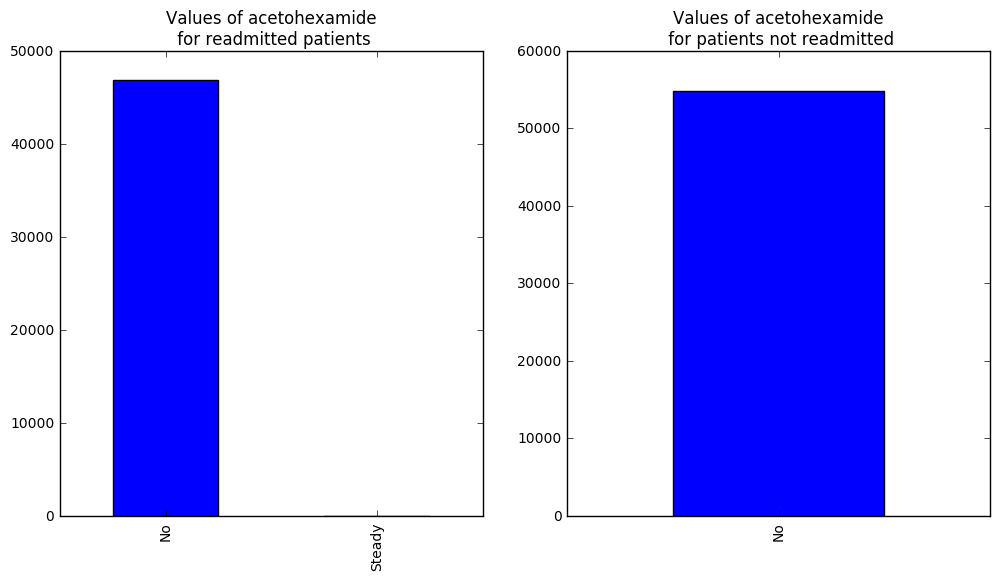

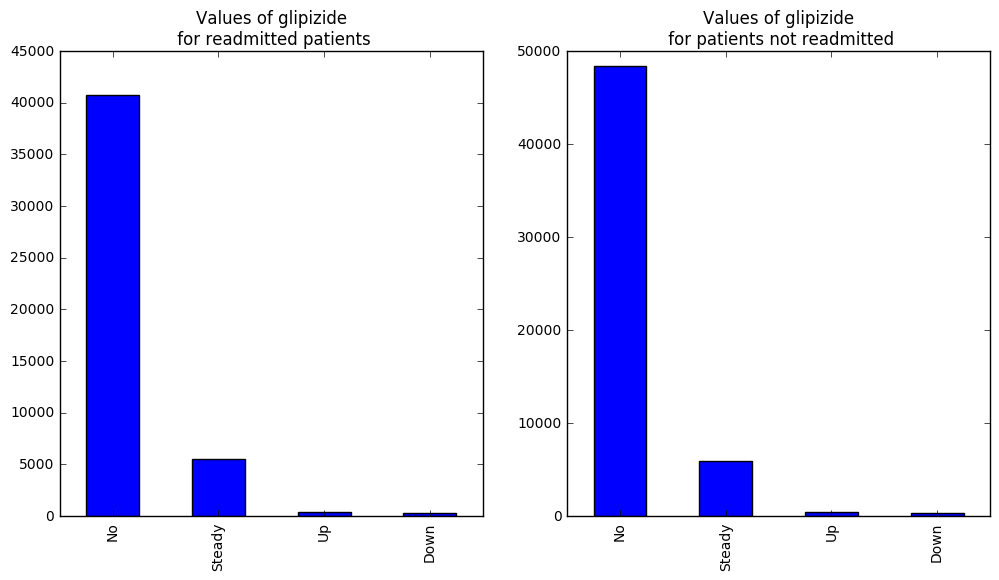

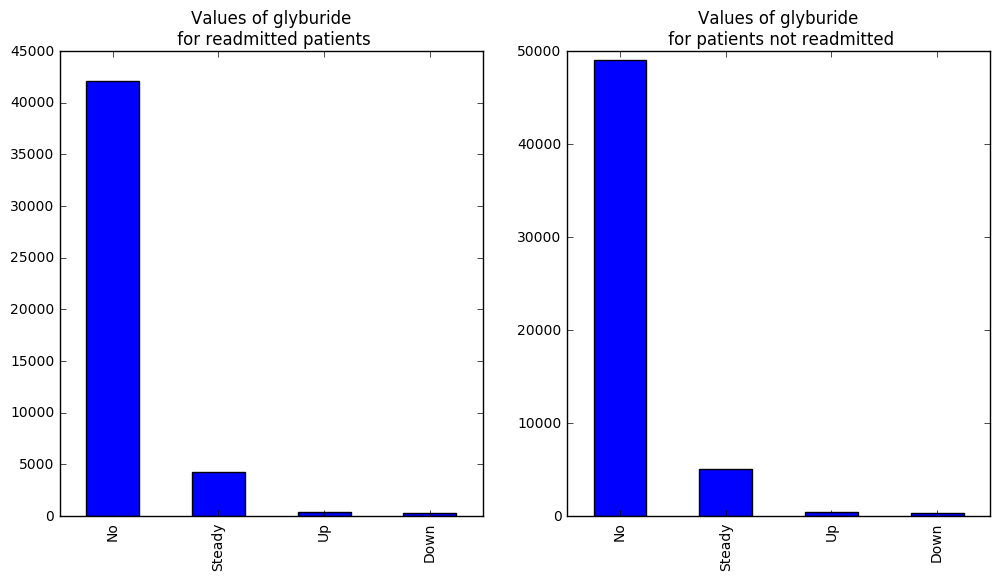

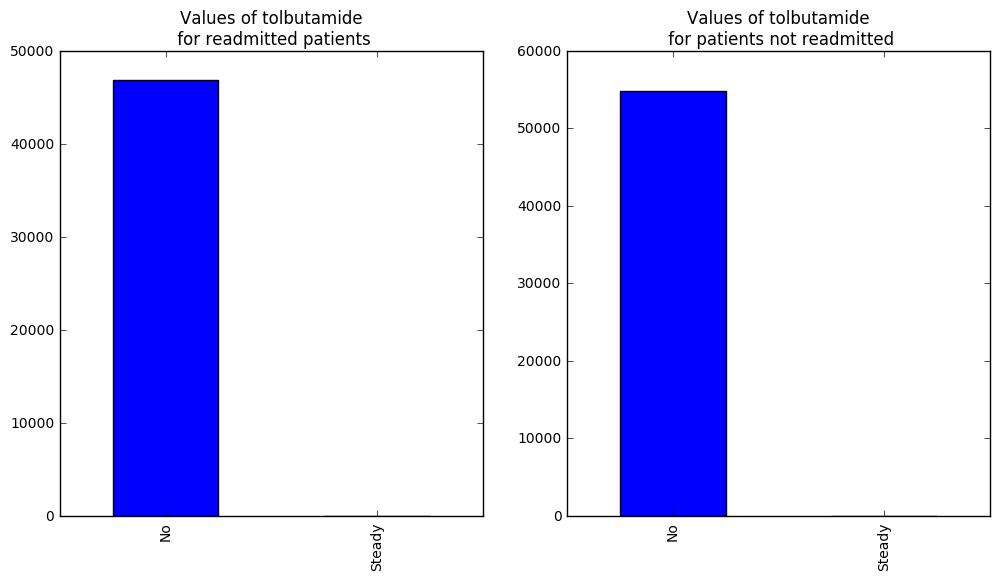

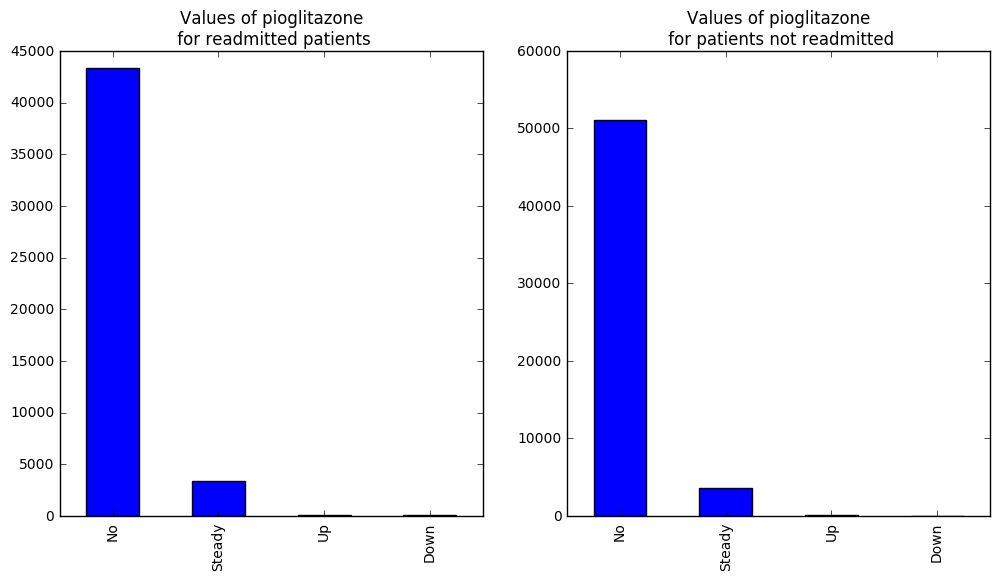

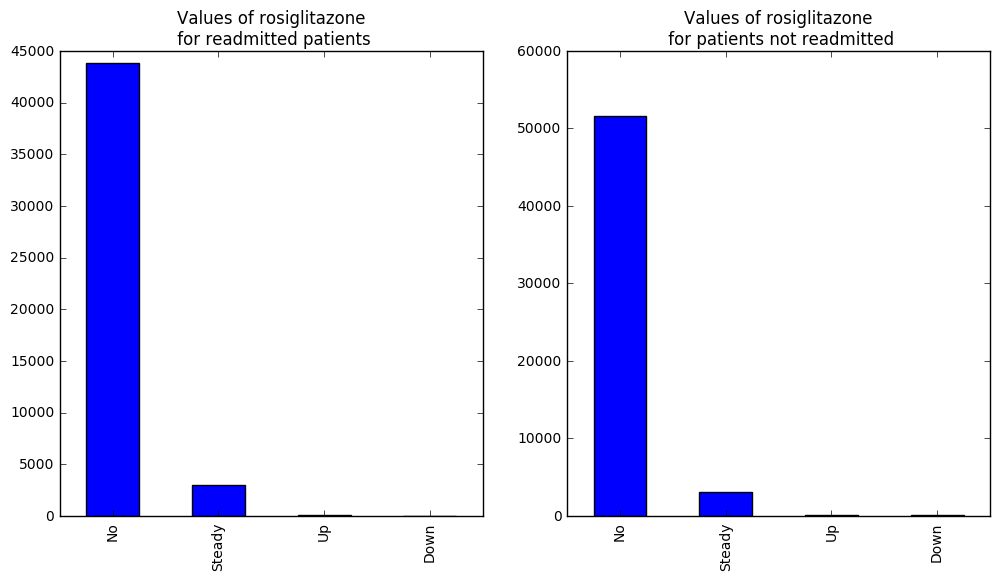

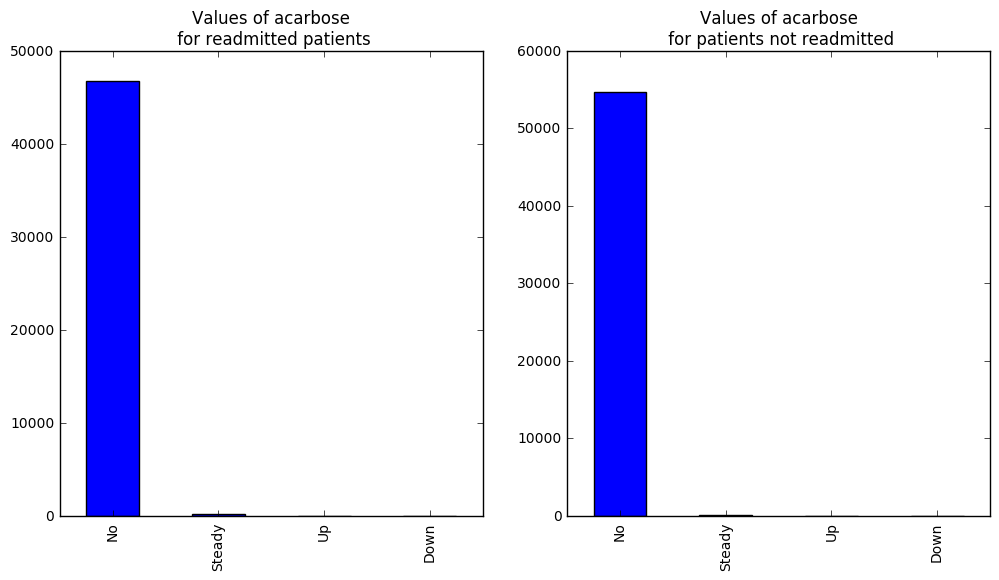

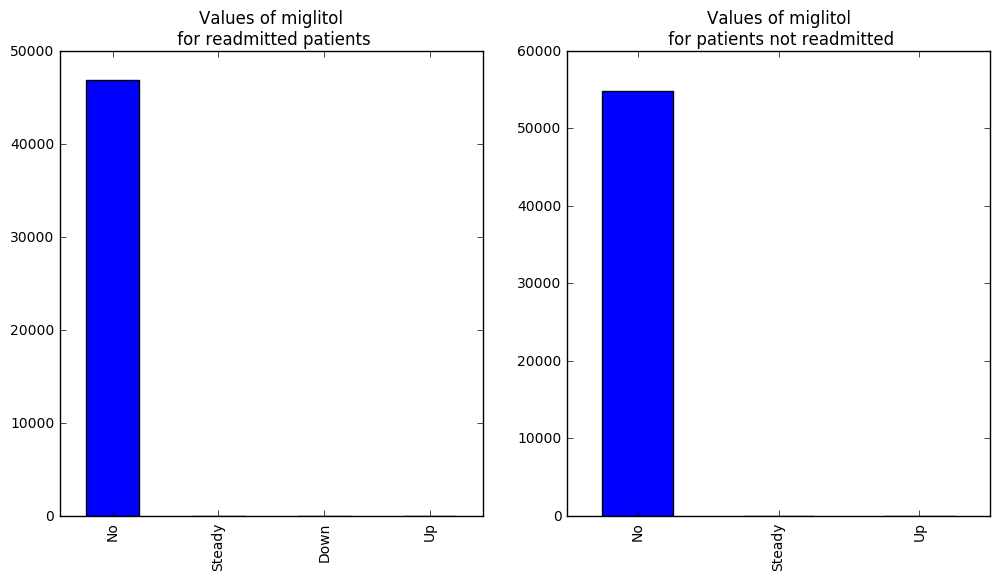

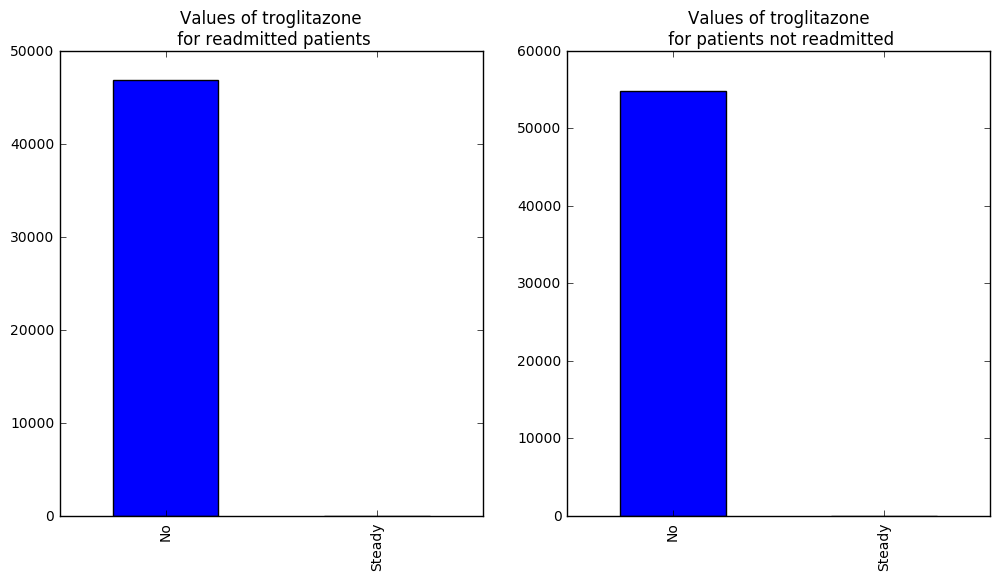

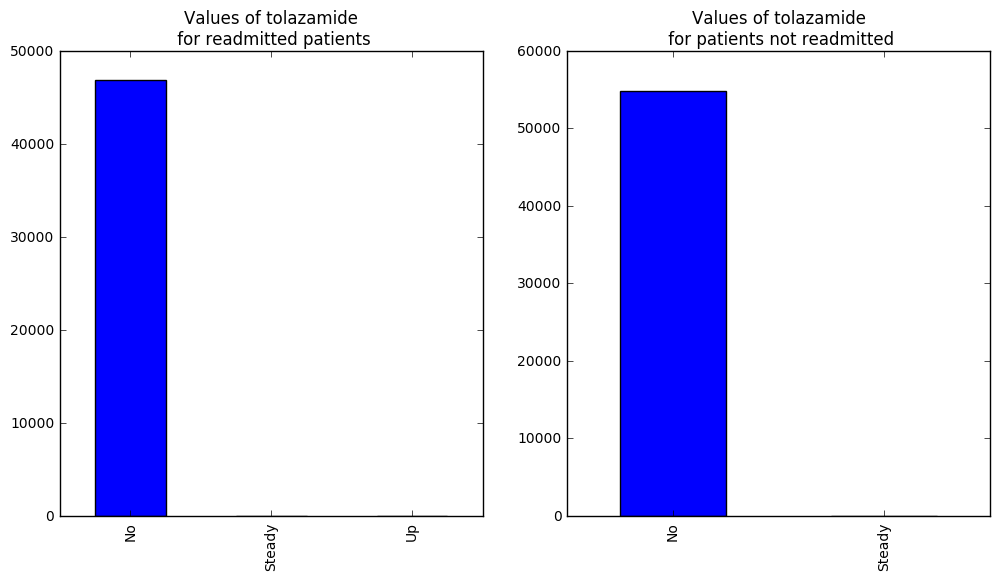

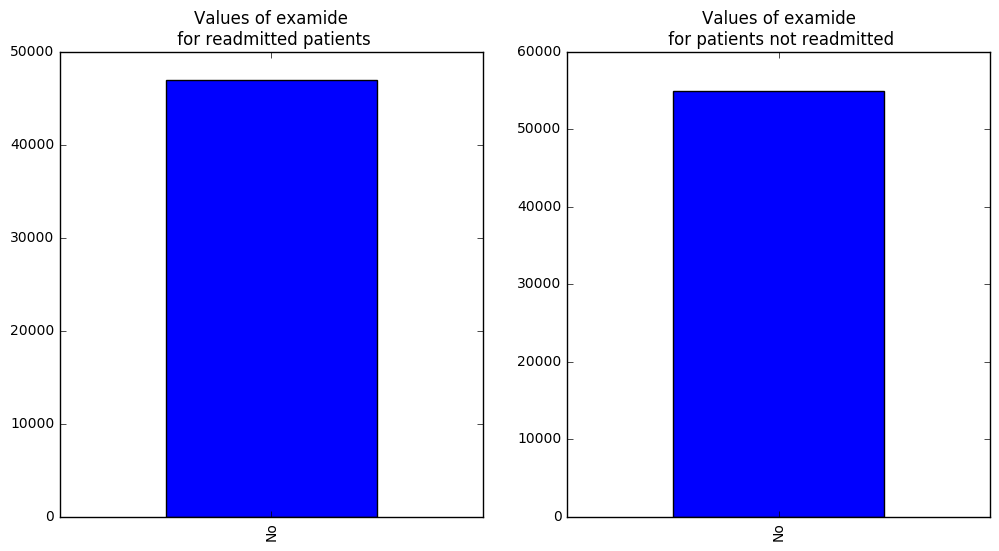

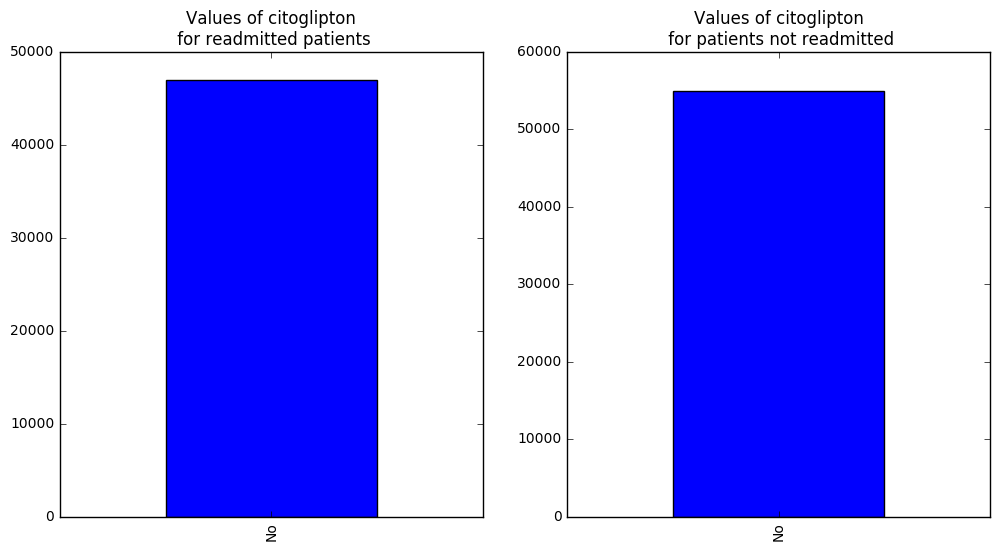

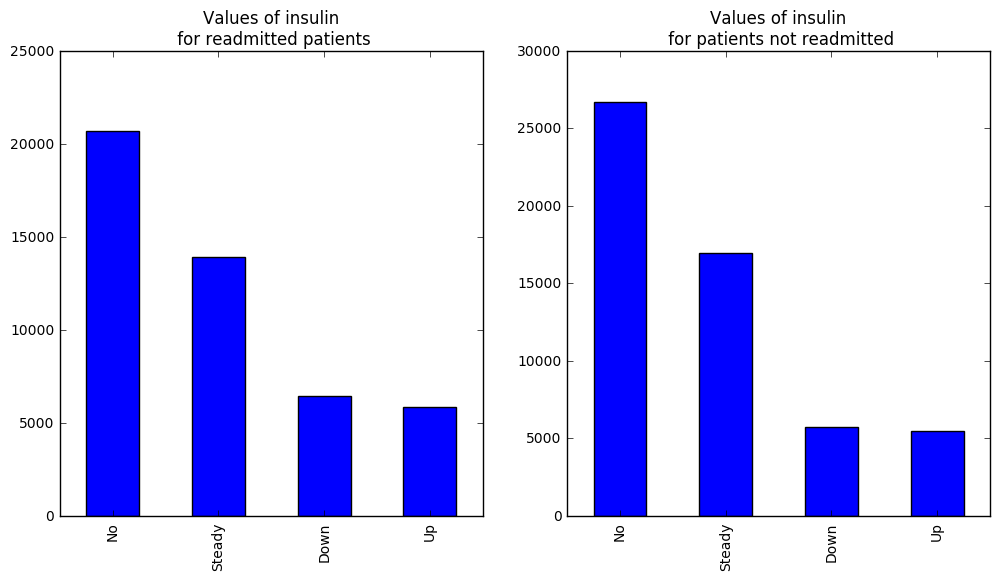

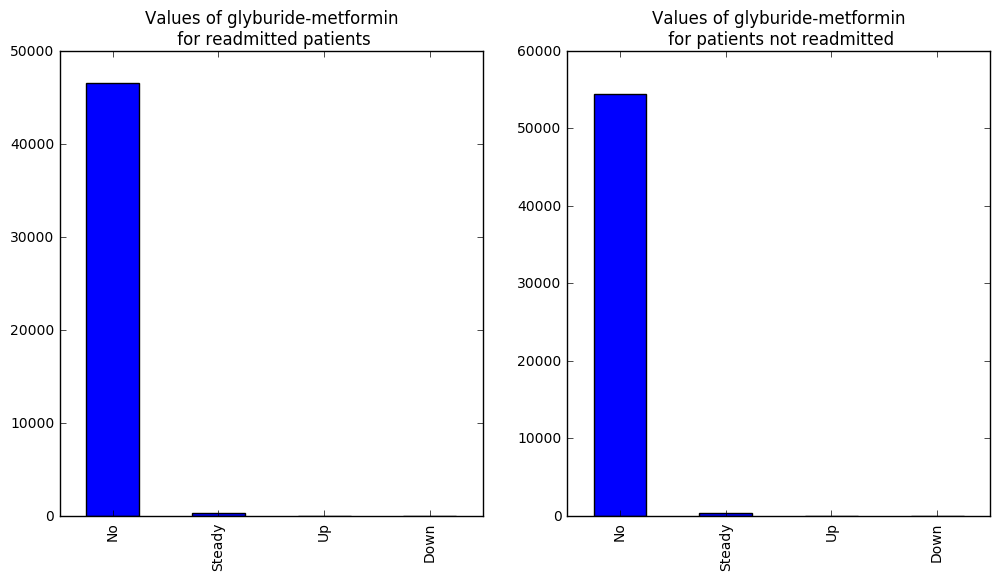

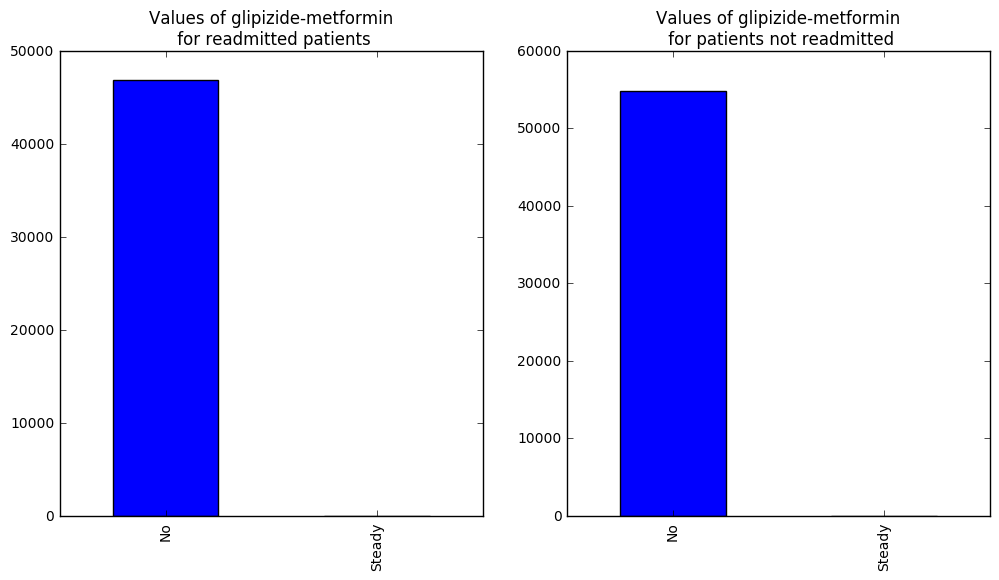

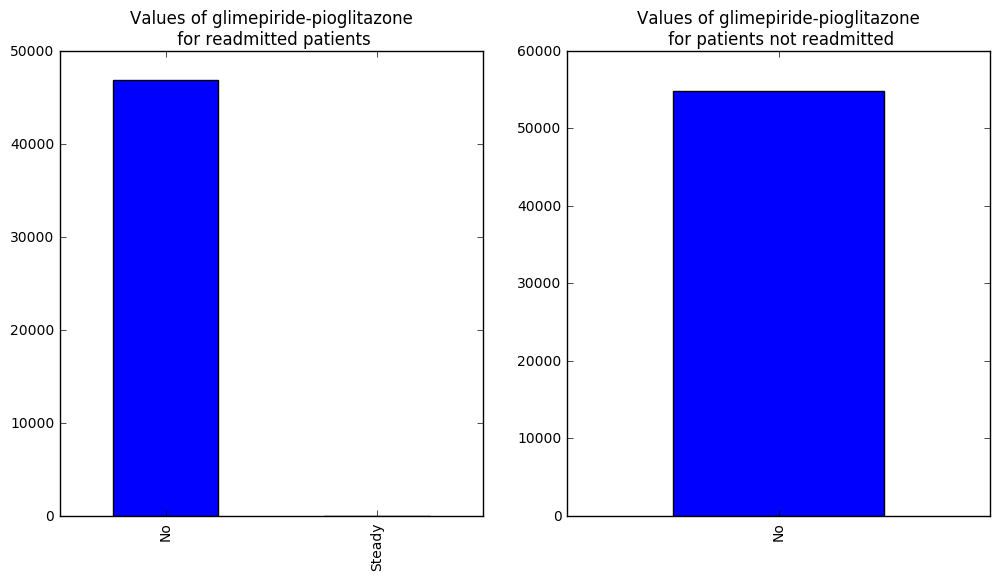

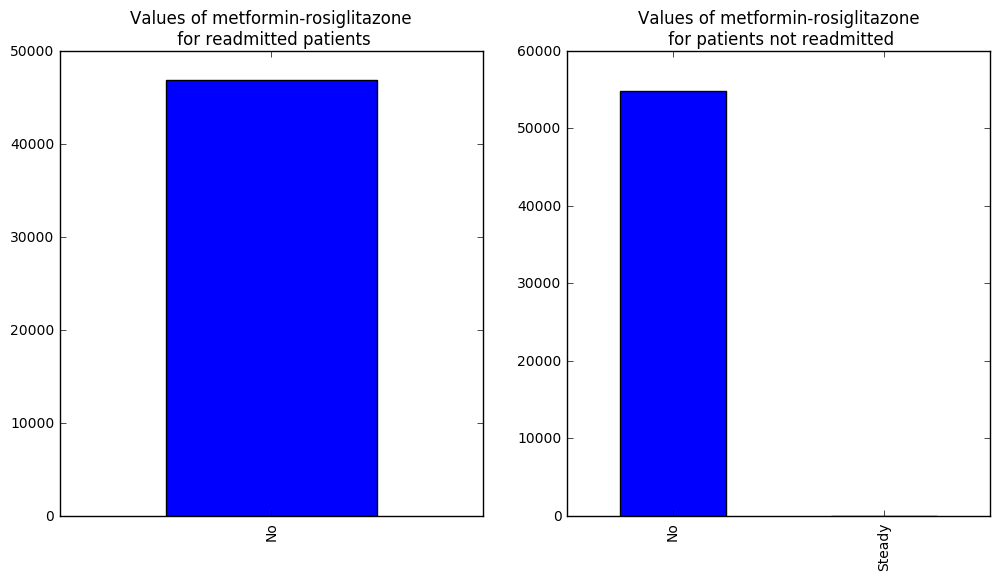

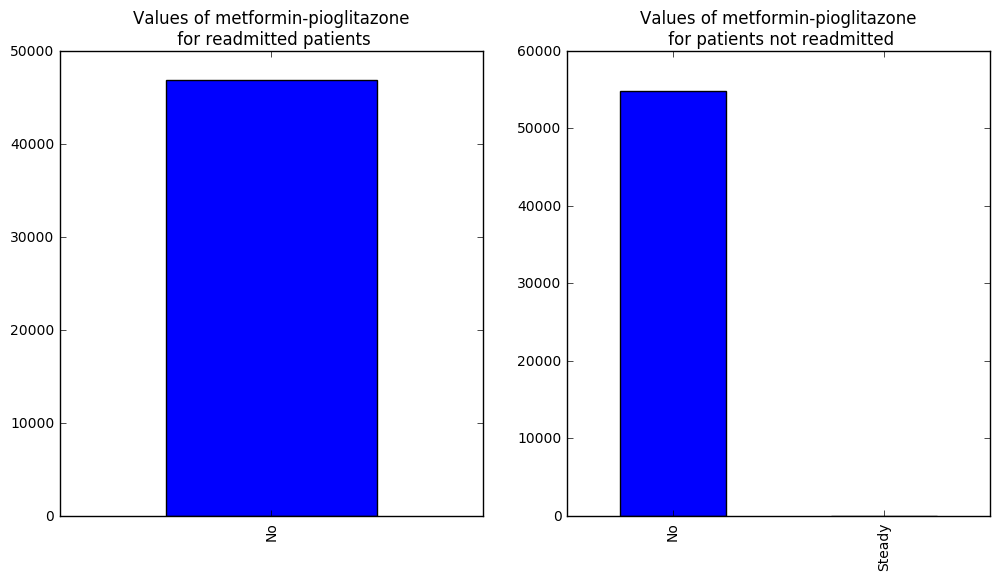

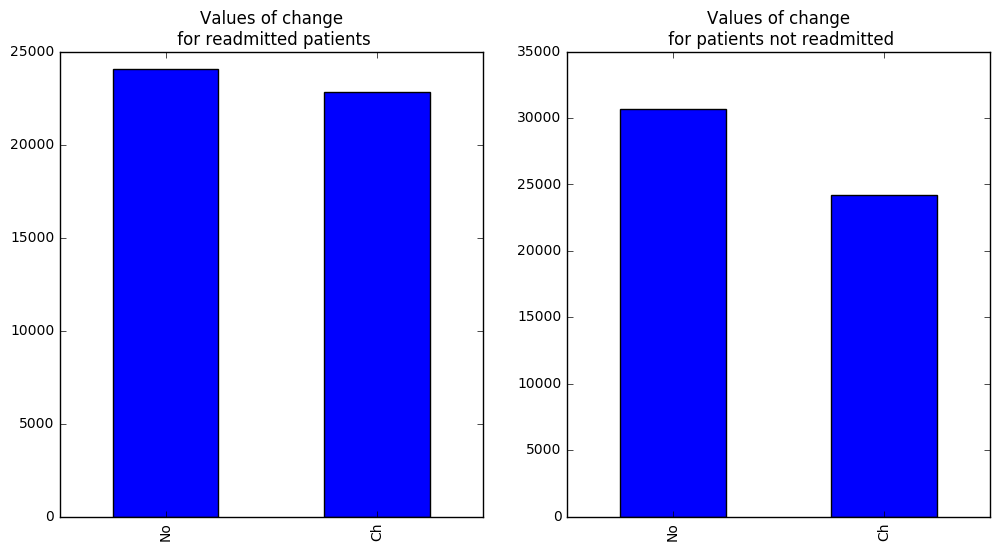

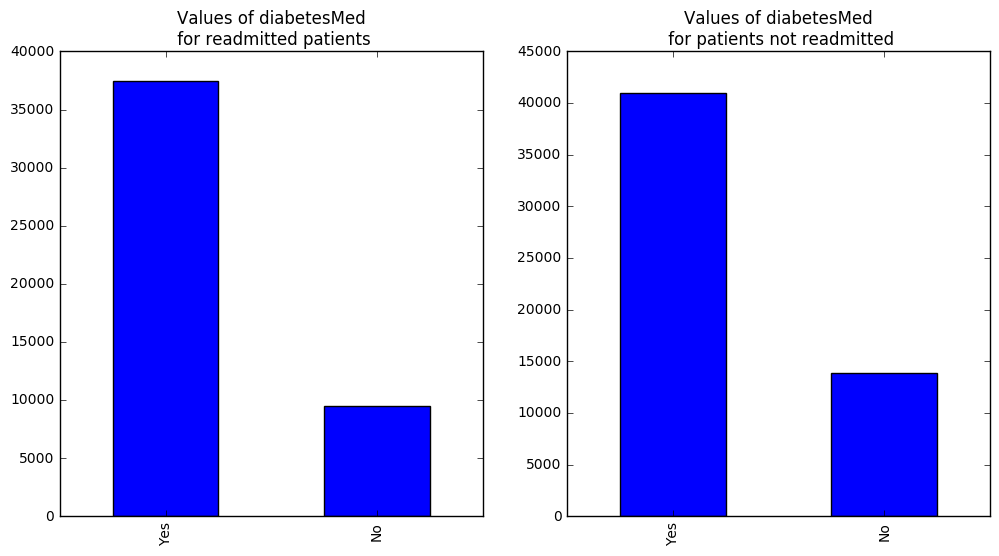

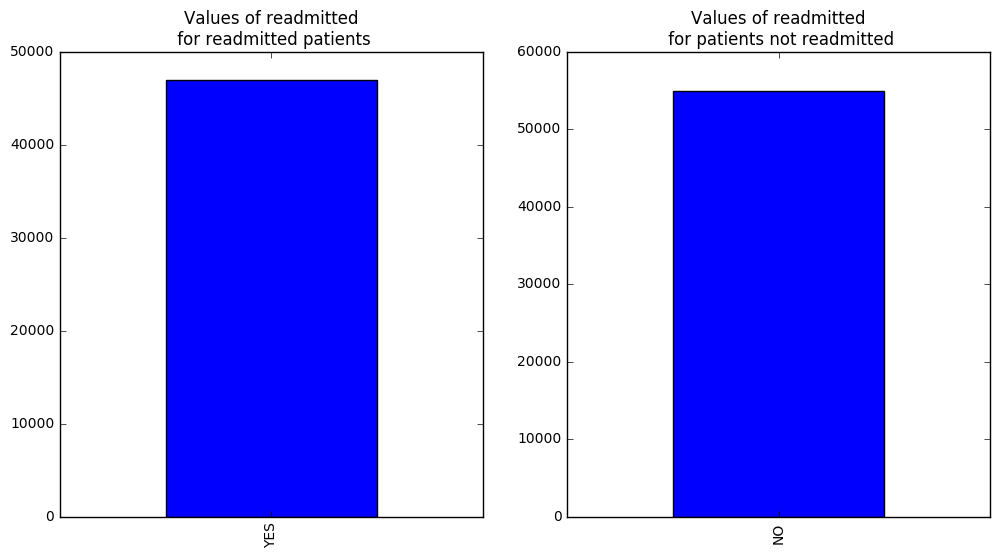

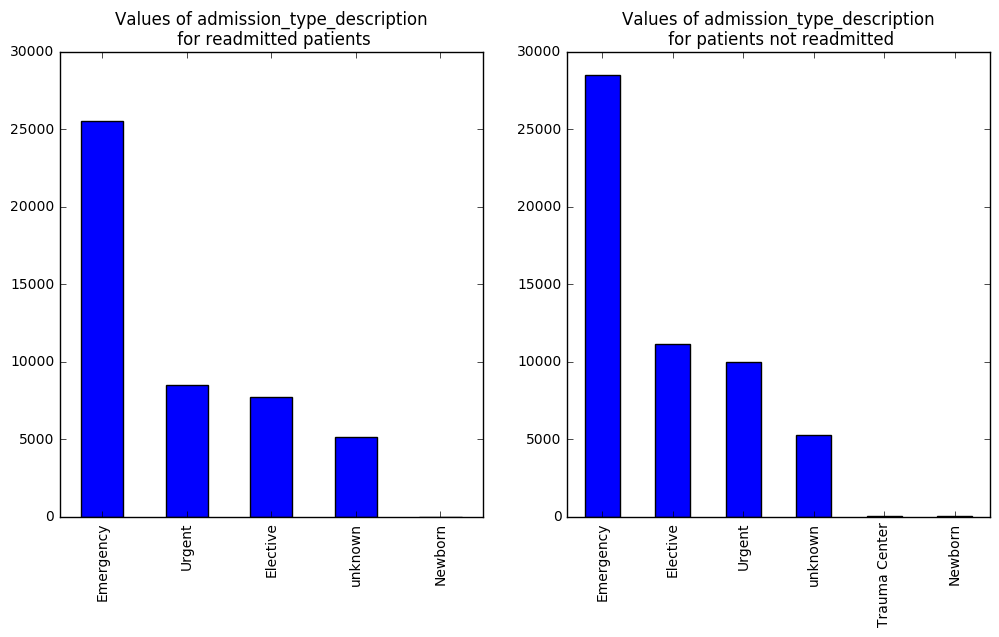

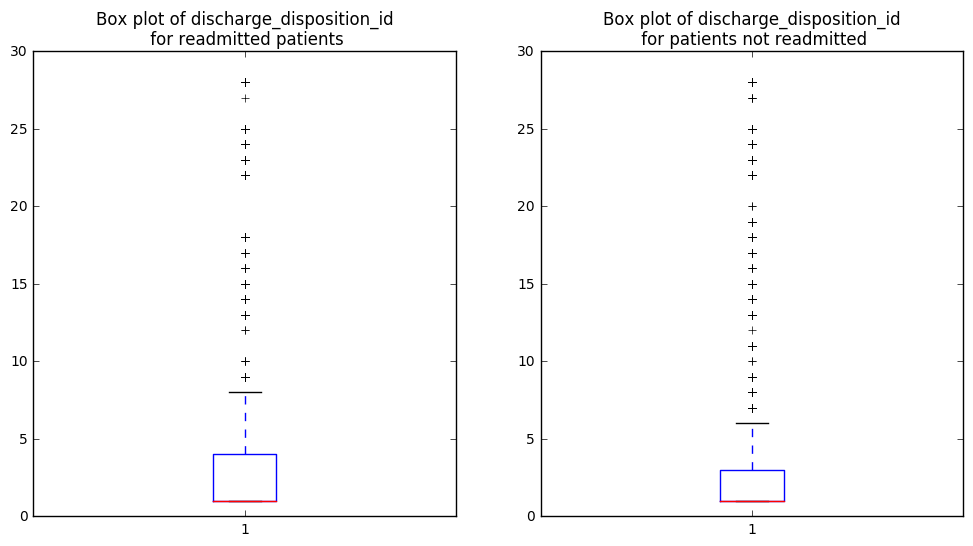

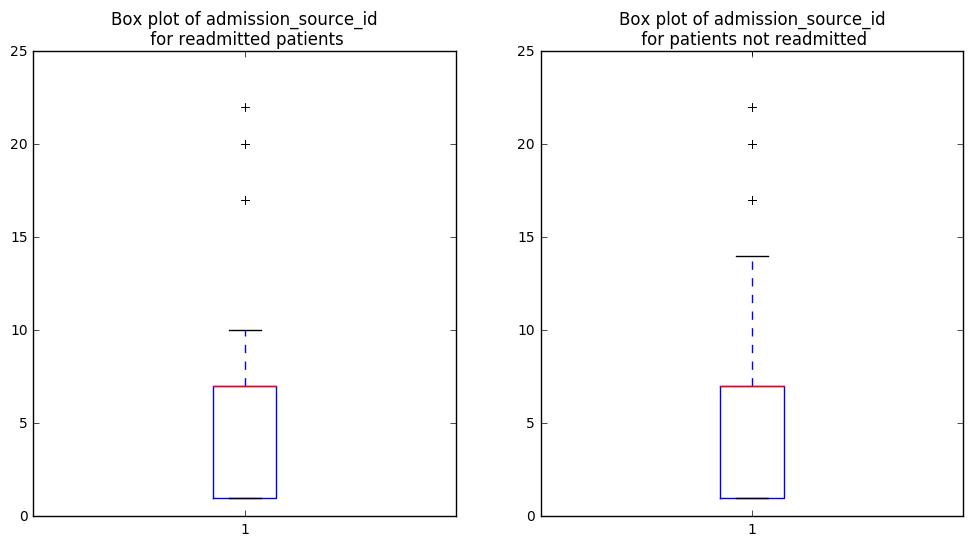

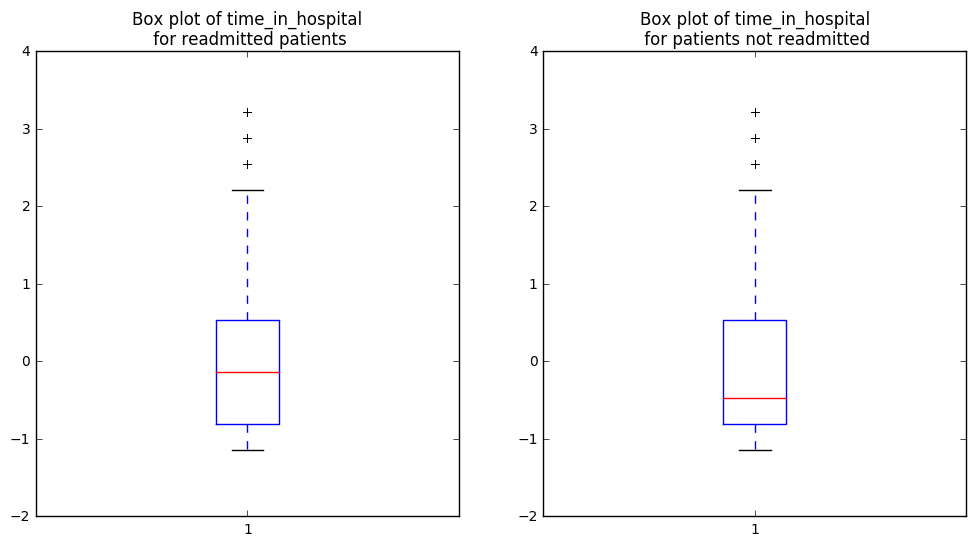

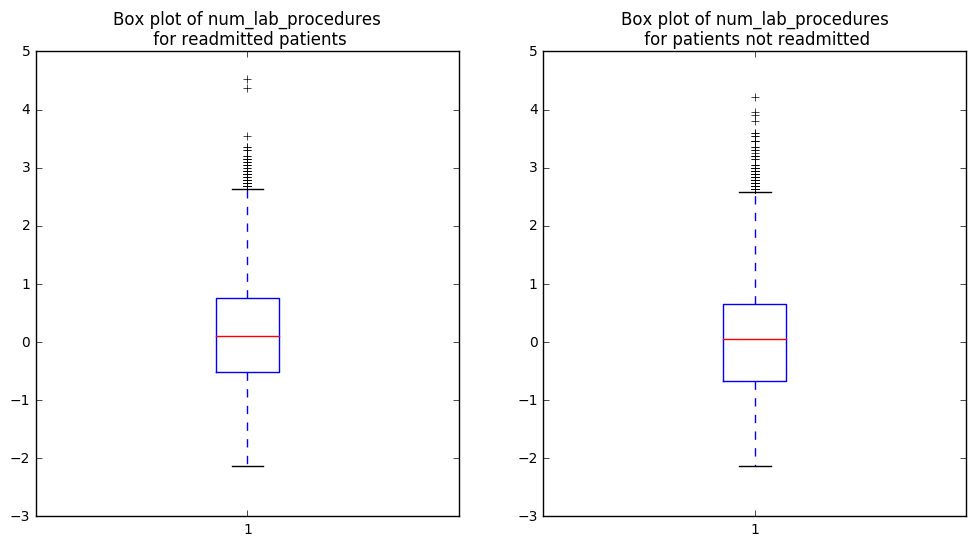

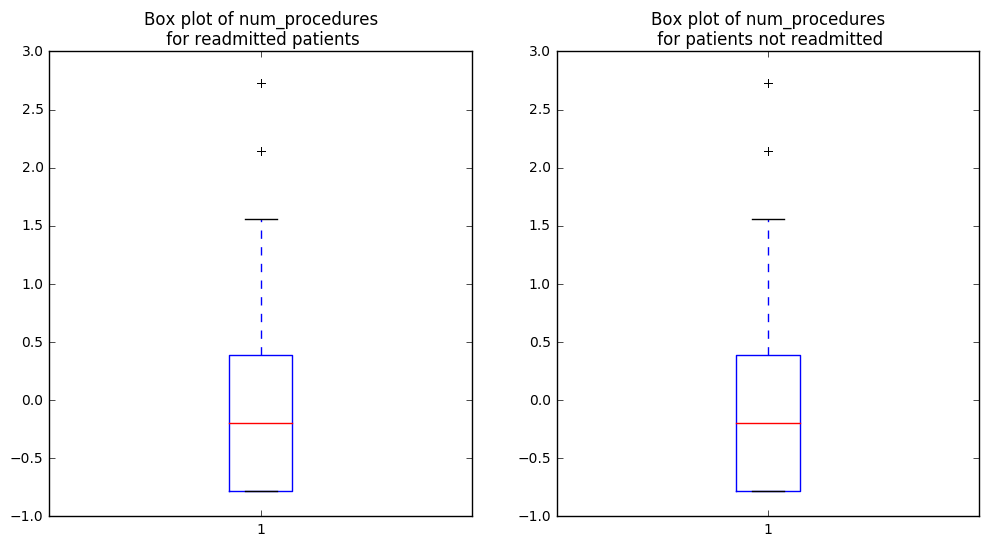

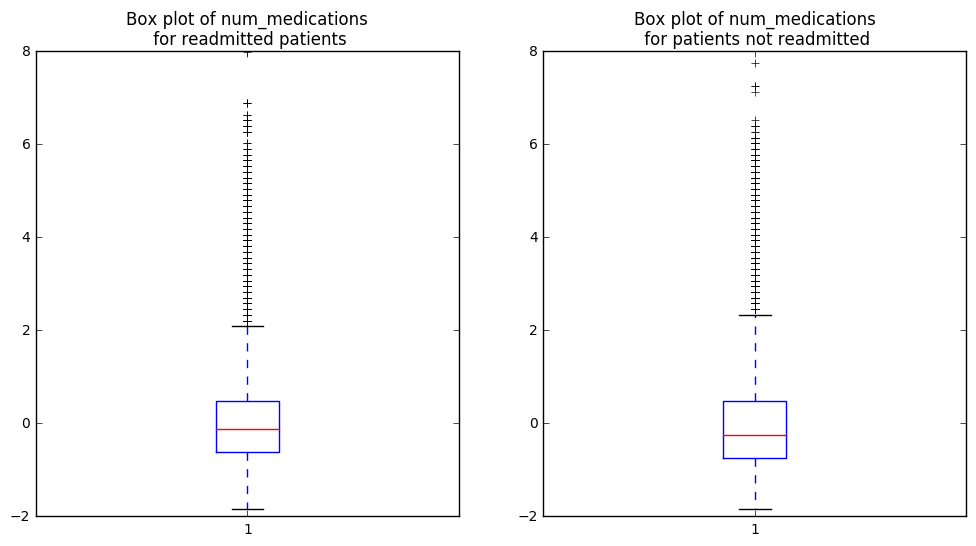

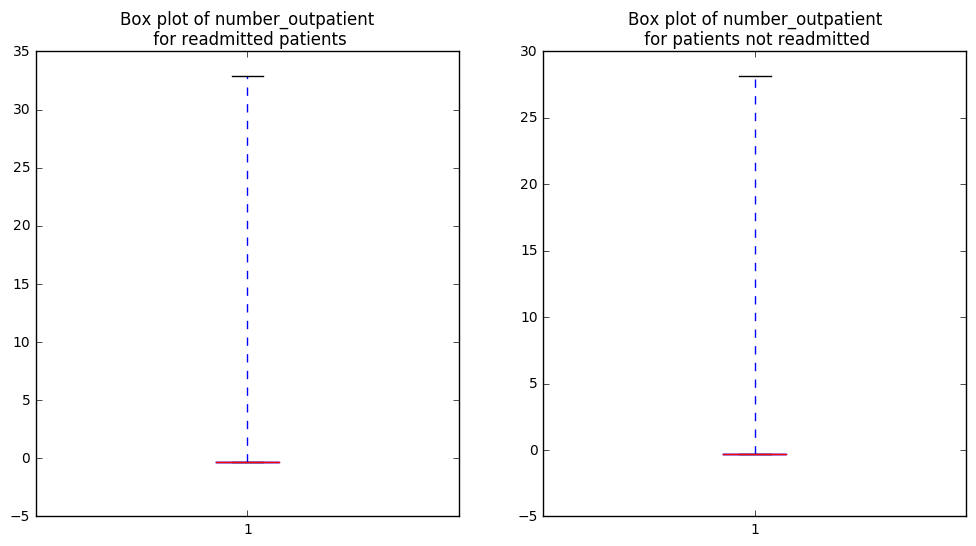

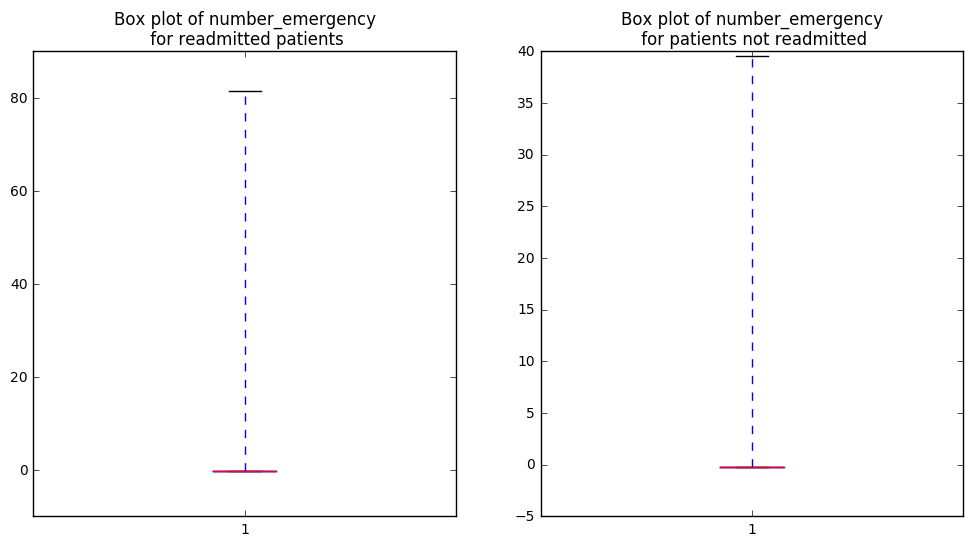

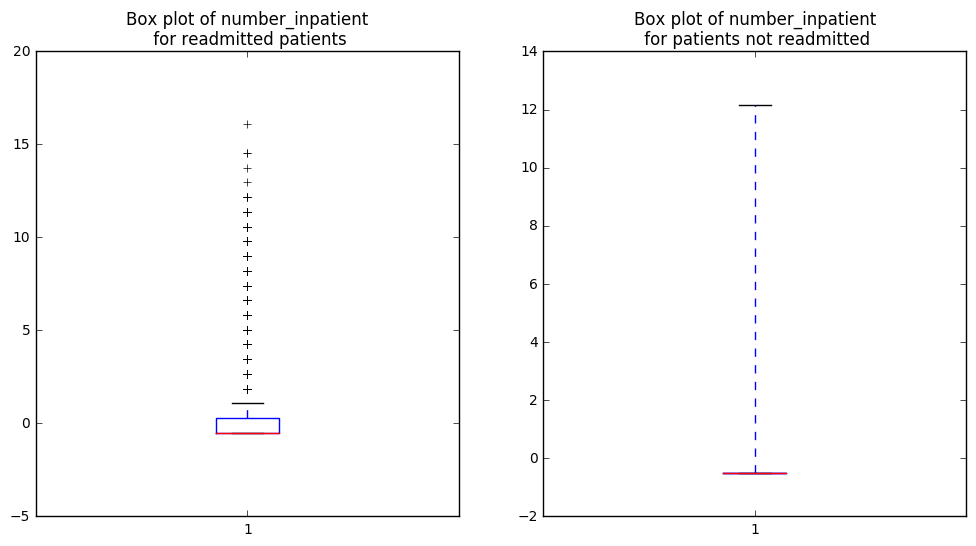

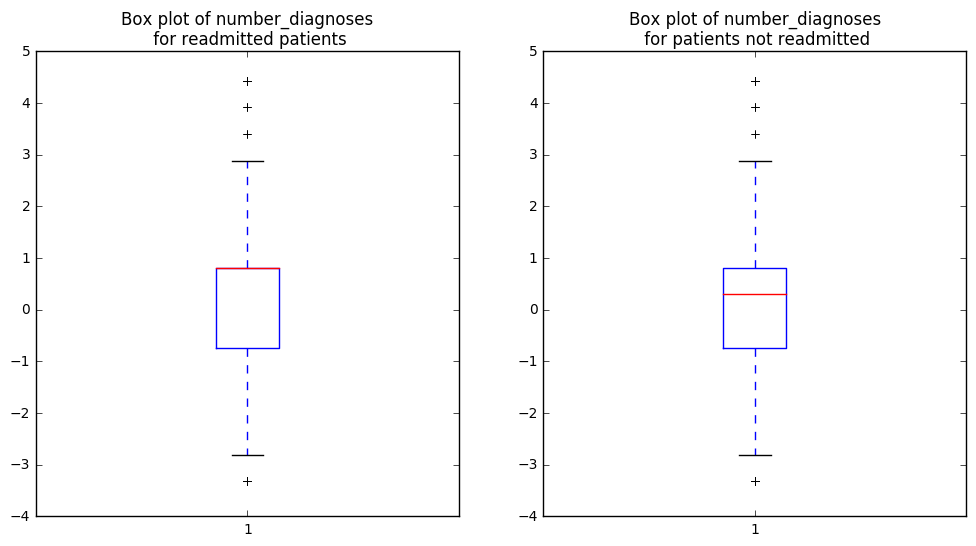

In [9]:
%matplotlib inline
diabetes_hist(frame)
diabetes_bar(frame)
diabetes_box(frame)